<font face="Times New Roman" size=5><div dir=rtl align=center>
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br> <br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Computer
</font>
<br> <br>
<font color="#008080" size=5>
Introduction to Machine Learning
</font>

<hr/> <br>
<font color="#800080" size=6>
Chapter 3: SVM (Support Vector Machine)
<br>
</font>
<br>
<font face="Times New Roman" size=4>
:authors <br>
<b>Alireza Gregory Motlaq - Peyman Naseri - Alireza Heydari - Mohammad Mahdi Vahedi</b>
</font>
<hr>
</div></font>

<font  size=5><div dir=ltr>
<font face="Times New Roman" color="#008080" size=5>**Table of Contents**</font>
<br>

<font size=4>
<ul>
    <li>
        <a href="#1">
            1. Support Vector Machine
        </a>
    </li> <br>
    <ul>
        <li>
            <a href="#1-1">
                1-1. Hard Margin SVM
            </a>
        </li>
        <ul>
            <li>
                <a href="#1-1-1">
                    1-1-1. From Scratch
                </a>
            </li>
            <li>
                <a href="#1-1-2">
                    1-1-2. Using Scikit Learn Library
                </a>
            </li>
        </ul> <br>
        <li>
            <a href="#1-2">
                1-2. Soft Margin SVM
            </a>
        </li>
        <ul>
            <li>
                <a href="#1-1-1">
                    1-2-1. What is the Challange?
                </a>
            </li>
            <li>
                <a href="#1-1-2">
                    1-2-2. Soft Margin Classifier
                </a>
            </li>
        </ul> <br>
        <li>
            <a href="#1-3">
                1-3. Kernel SVM
            </a>
        </li>
        <ul>
            <li>
                <a href="#1-3-1">
                    1-3-1. What is the Challange?
                </a>
            </li>
            <li>
                <a href="#1-3-2">
                    1-3-2. Introduction to Kernel
                </a>
            </li>
            <li>
                <a href="#1-3-3">
                    1-3-3. Polynomial Kernel
                </a>
            </li>
            <li>
                <a href="#1-3-4">
                    1-3-4. Radial Basis Function
                </a>
            </li>
        </ul> <br>
        <li>
            <a href="#1-4">
                1-4. Multi-Class SVM
            </a>
        </li>
    </ul> <br>
    <li>
        <a href="#-2">
            2. Support Vector Regression
        </a>
    </li> <br>
    <li>
        <a href="#-4">
            References
        </a>
    </li>
</div>

<font face="Times New Roman"><div id="1">
# <font color="#800080" size=6>**1. Support Vector Machine (SVM)**</font>
</div>

<font face="Times New Roman" size=3>
In the first section, we will implement a simplified model of SVM and then introduce the Scikit-Learn library, which is one of the most important and powerful libraries in the field of machine learning. In the following, we will implement more complex models using the modules of this library.
</font>

<font face="Times New Roman"><div id="1-1">
## <font color="#800080" size=6>**1-1. Hard Margin SVM** </font>
</div>

<font face="Times New Roman" size=3>
Also called: Hard Margin Classifier and Maximal Margin Classifier.<br>
In this chapter, we are looking for the best separating boundary, but what is this best boundary and how is it found? If we call the distance of the closest point to the border as margin, the best line separating two classes is the line that maximizes this distance.To find this boundy, we implement our model in two ways. First from scratch and then using the scikit-learn library. We use the same dataset in both parts.
</font>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Introduction to Dataset </font>


<font face="Times New Roman" size=3>
For simplicity and presentation, we generate an artifical linearly-separable dataset with 2 features and 250 samples using make_blobs function from scikit-learn.datasets.
</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [31]:
from sklearn import datasets

N = 250
p = 2
X, y = datasets.make_blobs(
    n_samples=N, n_features=p, centers=2, cluster_std=1.05, random_state=1
)

##### <font color="#008080" face="Times New Roman" size=4> - Visualizing Dataset </font>

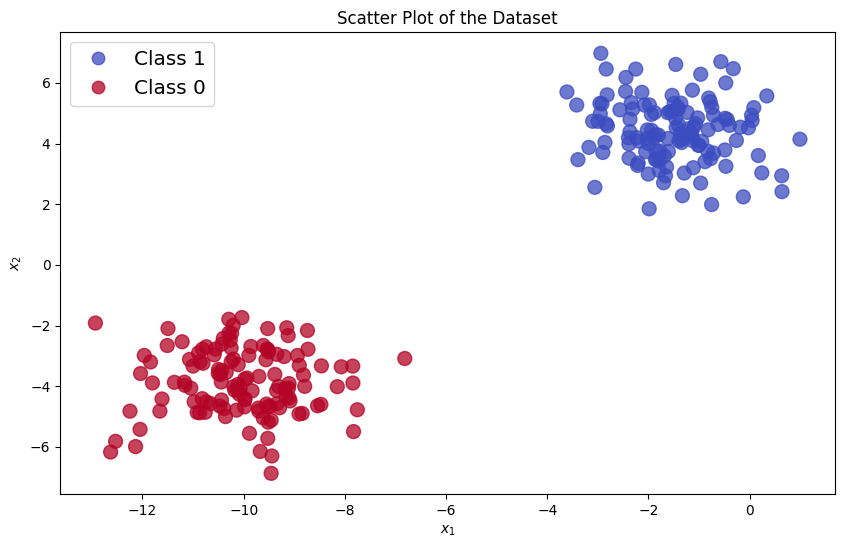

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', cmap='coolwarm', c=y, s=100, alpha=0.75);
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.show();

<font face="Times New Roman" size=3>
According to the results, our dataset is fully linearly separable; So we expect the accuracy of our algorithms on these data to be 100%.
</font>

##### <font color="#008080" face="Times New Roman" size=4> - Some Exmaple Of Boundaries With Thier Margins </font>

<font face="Times New Roman" size=3>
We plot some examples of boundaries with their margins.
</font>

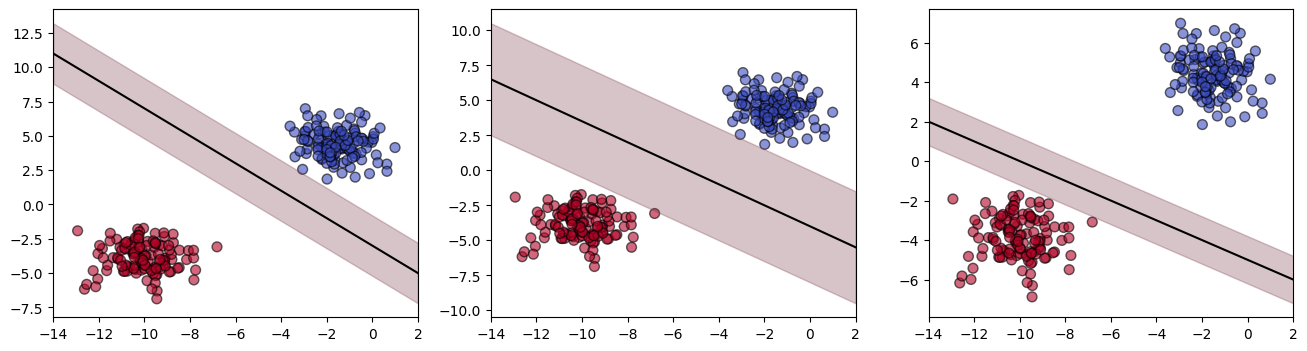

In [33]:
import numpy as np

plt.figure(figsize=(16, 4))

# draw separators and margins
x_values = np.linspace(-14, 2)
for i, (w, b, m) in enumerate([(-1, -3, 2.2), (-0.75, -4, 4), (-0.5, -5, 1.2)]):
    plt.subplot(1, 3, i + 1)

    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    y_values = w * x_values + b

    # draw separator and margin
    plt.plot(x_values, y_values, '-k')
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='#7D3C4A', alpha=0.3)
    plt.xlim(-14, 2)

plt.show()

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>


<font face="Times New Roman" size=3>
To build the model, we first fit our model on the training data and then check the accuracy of its prediction on the test data; Here, 80% of the data is used for training and the other 20% for testing the model.
Since the generated data was random, we don't need to shuffle before partitioning.
</font>

In [34]:
frac = 0.8
train_size = int(frac*N)
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:, :]
y_test = y[train_size:]

<font face="Times New Roman"><div id="1-1-1">
### <font color="#800080" size=5>**1-1-1. From Scratch**</font>
</div>

<font face="Times New Roman" size=3>
For this purpose, we define a class called <code>maxMargin_classifier</code>, which contains the methods required to implement this algorithm. In the following, an initial definition and the generality of our intended class to implement the algorithm is given as a map along the way. According to the description of each method, we will try to complete it. The only library we need for this implementation is the numpy library.
</font>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [35]:
import numpy as np

class maxMargin_classifier:

    def __init__(self, learning_rate=1e-3, C=10, n_iters=1000):
        """
        Class initializer: Initialize class parameters including:
            lr: learning rate of gradient descent algorithm, default=0.001
            C: C hyperparameter of hinge loss in cost function, default=10
            n_iters: number of iterations in gradient_descent, default=1000
            w: weights(normal vector) of maximal margin hyperplane (parameters of the algorithm)
            b: intercept(bias) of maximal margin hyperplane (parameter of the algorithm)
        """
        pass

    #-------------------------------------------#

    def init_params(self, X):
        """
        Initializer of the algorithm's parameters (w & b)
        Inputs:
            X: N*p matrix including N samples with p features
        """
        pass

    #-------------------------------------------#

    def get_class_map(self, y):
        """
        Mapping the targets' classes from {0,1} to {-1,1}
        Inputs:
            y: N-vector of class labels
        """
        pass

    #-------------------------------------------#

    def satisfy_constraint(self, x, idx):
        """
        Checks wether the constraint of hinge loss is satisfied, i.e. which loss function(J1 or J2)
        and corresponding gradients are needed to be calculated.
        Inputs:
            x: a training sample
            idx: index of x
        """
        pass

    #-------------------------------------------#

    def get_gradients(self, constraint, x, idx):
        """
        Get the gradient for a training sample
        Inputs:
            constraint: wether or not the "satisfy_constraint" method returns true
            x: a training sample
            idx: index of x
        """
        pass

    #-------------------------------------------#

    def update_params(self, dw, db):
        """
        Update the parameters, weights(w) and bias(b)
        Inputs:
            dw: partial derivative of cost function w.r.t. weights
            db: partial derivative of cost function w.r.t. bias
        """
        pass

    #-------------------------------------------#

    def fit(self, X, y):
        """
        Fit the model on the training set
        Inputs:
            X: N*p matrix of training set, N samples with p features
            y: target values of binary classes
        """
        pass

    #-------------------------------------------#

    def predict(self, X):
        """
        Predict the class of new samples.
        Inputs:
            X: k*p matrix of new samples, k samples with p features
        """
        pass

<font face="Times New Roman" size=3>
Now we complete the parts of this class; At first, we implement the basic methods of this class and initialize the parameters of the class. For simplicity, we consider the initial value of weights and bias equal to zero.
</font>

In [36]:
...
def __init__(self, learning_rate=1e-3, C=10, n_iters=1000):
    self.lr = learning_rate
    self.C = C
    self.n_iters = n_iters
    self.w = None
    self.b = None

def init_params(self, X):
    p = X.shape[1]
    self.w = np.zeros(p)
    self.b = 0
...

Ellipsis

<font face="Times New Roman" size=3>
As mentioned, in this algorithm we need our data label to be {−1,1} instead of {0,1}. Therefore, since in most cases, the initial labels are 0 and 1, we need a method to do this conversion. With this in mind, try to complete the <code>get_class_map</code> method. The input to this function is a binary vector of data labels, and you must perform this mapping and return the new $𝑦$ vector.
</font>

In [37]:
...
def get_class_map(self, y):
    return #YOUR CODE
...

Ellipsis

<font face="Times New Roman" size=3>
We also need methods that can obtain and update their corresponding gradients depending on the current value of the model parameters. For this purpose, 3 methods have been written to first check in which cost function mode we are; As it is clear from the defined cost function, this condition is as follows:<br><br>
<center> $ y^{(i)}(w^T x^{(i)} + b) \geq 1 $ </center>
<br>Then, according to the result of this condition, we get the gradients with respect to the model parameters, $𝑤$ and $𝑏$ and update them. Of course, you can combine all 3 methods together and implement them in one method.
</font>

In [38]:
...
def satisfy_constraint(self, x, idx):
    ##Checks wether   y(w^T x + b) >= 1
    linear_model = np.dot(x, self.w) + self.b
    return self.encoded_y[idx] * linear_model >= 1

def get_gradients(self, constraint, x, idx):
    #Case1: J1
    if constraint:
        dw = self.w
        db = 0
        return dw, db

    #Case2: J2
    ### YOUR CODE
    return dw, db

def update_params(self, dw, db):
    #YOUR CODE
    pass
...

Ellipsis

<font face="Times New Roman" size=3>
Now we have to fit our model on the training samples with the help of the functions that we have implemented in the previous section. So first we initialize the parameters of the model and then by mapping the data labels, we find the optimal parameters with the help of the gradient descent algorithm.
</font>

In [39]:
...
def fit(self, X, y):
    self.init_params(X) #Initialization of parameters
    self.encoded_y = self.get_class_map(y) #Encode y using the "get_class_map" method

    #Iterate and update your parameters
    for _ in range(self.n_iters):
        for idx, x in enumerate(X):
            constraint = self.satisfy_constraint(x, idx) #Check the constraint for cost function
            dw, db = self.get_gradients(constraint, x, idx) #get the gradient using the constraint
            self.update_params(dw, db) #Update the parameters
...

Ellipsis

<font face="Times New Roman" size=3>
Finally, we should be able to predict the class of new examples using our model. For this purpose, implement the predict method.<br>
Hint: This can be found using the position of the sample relative to the fitted hyperplane as shown below:<br><br>
<center>  $f(x) = w^T x + b$ <br><br>
\begin{cases}
    \hat{y} = +1 \qquad if \quad f(x) > 0\\
    \\
    \hat{y} = -1 \qquad if \quad f(x) < 0
\end{cases}
</font>

In [40]:
...
def predict(self, X):
    #YOUR CODE
    pass


<font face="Times New Roman" size=3>
Now we have all the puzzle pieces we need to complete our class and just put them together.
</font>

In [41]:
import numpy as np

class maxMargin_classifier:
    def __init__(self, learning_rate=1e-3, C=10, n_iters=1000):
        self.lr = learning_rate
        self.C = C
        self.n_iters = n_iters
        self.w = None
        self.b = None
    #_____________________________________________________#

    def init_params(self, X):
        p = X.shape[1]
        self.w = np.zeros(p)
        self.b = 0
    #_____________________________________________________#

    def get_class_map(self, y):
        #YOUR CODE
        return np.where(y <= 0, -1, 1)
        #pass

    #_____________________________________________________#


    def satisfy_constraint(self, x, idx):
        ##Checks wether   y(w^T x + b) >= 1
        linear_model = np.dot(x, self.w) + self.b
        return self.encoded_y[idx] * linear_model >= 1
    #_____________________________________________________#

    def get_gradients(self, constraint, x, idx):
        #Case1: J1
        if constraint:
            dw = self.w
            db = 0
            return dw, db
        #Case2: J2
        dw = self.w - self.C * np.dot(self.encoded_y[idx], x)
        db = - self.C * self.encoded_y[idx]
        return dw, db
    #_____________________________________________________#

    def update_params(self, dw, db):
        #YOUR CODE
        self.w -= self.lr * dw
        self.b -= self.lr * db
        #pass
    #_____________________________________________________#

    def fit(self, X, y):
        self.init_params(X)
        self.encoded_y = self.get_class_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constraint = self.satisfy_constraint(x, idx)
                dw, db = self.get_gradients(constraint, x, idx)
                self.update_params(dw, db)

    #_____________________________________________________#

    def predict(self, X):
        #YOUR CODE
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)
        #pass

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [42]:
#Build the classifier
clf = maxMargin_classifier(learning_rate=1e-3, C=10, n_iters=1000)
#Fit the model on the train data
clf.fit(X_train, y_train)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction</font>

In [43]:
#Predict the model on test data
y_pred_test = clf.predict(X_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [44]:
#Find the accuracy of model on test set using the predicted labels with their true values
accuracy = np.sum(y_test==y_pred_test) / len(y_test)

print("Maximal Margin Classifier Accuracy:", accuracy*100, "%")

Maximal Margin Classifier Accuracy: 100.0 %


#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>
<font face="Times New Roman" size=3>
Finally, we can plot the optimal boundary along with the obtained margin and confirm our results.
</font>

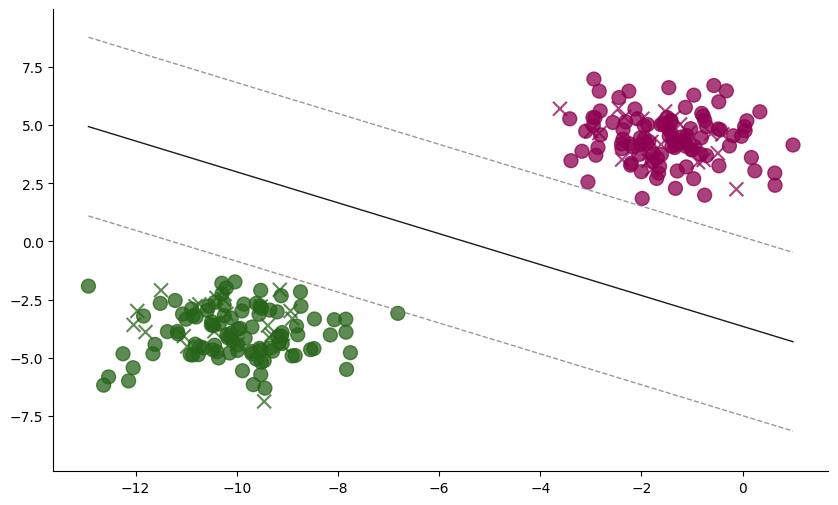

In [45]:
#a simple functin to get the hyperplane from the weights and bias of model
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.set_cmap('PiYG')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

plt.show();

<font face="Times New Roman"><div id="1-1-2">
### <font color="#800080" size=5>**1-1-2. Using Scikit Learn Library**</font>
</div>

<font face="Times New Roman" size=3><div>
Scikit-learn is an open source Python library that provides many tools for machine learning and statistical modeling of data such as classification, regression, clustering, and dimensionality reduction. This library is designed based on [Numpy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), [Scipy](https://scipy.org/) and [Matplotlib](https://matplotlib.org/) libraries.
To learn more about scikit-learn, you can visit its [website](https://scikit-learn.org/stable/).</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

<font face="Times New Roman" size=3>
Like other classifiers, SVC is modeled with two arrays:

*   The X matrix that holds the training samples and has the size of [n_samples, n_features].
*   The y array that stores the target values. The label class is for test samples and is of size [n_samples].

Many machine learning algorithms have hyperparameters that we must specify before training the model; For example, in this classification, we must specify the kernel hyperparameter. This hyperparameter will be explained more fully in the following; But for now, know that by setting it to linear, it actually trains the desired Maxiaml Margin Classifier.
</font>

In [46]:
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(kernel='linear')

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

<font face="Times New Roman" size=3>
Finally, we fit the classifier on input X and output y by applying the fit method.
</font>

In [47]:
# train the classifier
clf.fit(X, y)

SVC(kernel='linear')

###### <font color="#008080" face="Times New Roman" size=3> - Results </font>
<font face="Times New Roman" size=3>
Now we can get the weight of each feature of the input data with the help of the <code>coef_</code> attribute and the bias of the separating hyperplane with the help of the <code>intercept_</code> attribute.
</forn>

In [48]:
print("w =", clf.coef_)
print("b =", clf.intercept_)

w = [[-0.16340638 -0.24552258]]
b = [-0.87172498]


<font face="Times New Roman" size=3>
The above values show that the equation of the separating hyperplane is: <br> <center>$f(X) = w_1x_1+w_2x_2+b = -0.1634x_1 -0.2455x_2 -0.8717 = 0$
</font>

<font face="Times New Roman" size=3>
In this model, the support vectors are stored in <code>support_vectors_</code> and we can see which examples contributed to determining the optimal hyperplane.
</font>

In [49]:
clf.support_vectors_

array([[-3.05810916,  2.55776688],
       [-6.81531254, -3.08753469]])

<font face="Times New Roman" size=3>
We can also predict new data class using the <code>predict</code> method.
</font>

In [50]:
new_samples = [[0, 5],
              [-4, -1]]
print(clf.predict(new_samples))

[0 1]


#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

<font face="Times New Roman" size=3>
Finally, with the help of the <code>plot_svc_decision_boundary</code> method written below, we draw the optimal line separating the two classes obtained in this model.
</font>

In [51]:
# Plot helper function
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()

    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)

    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])

    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

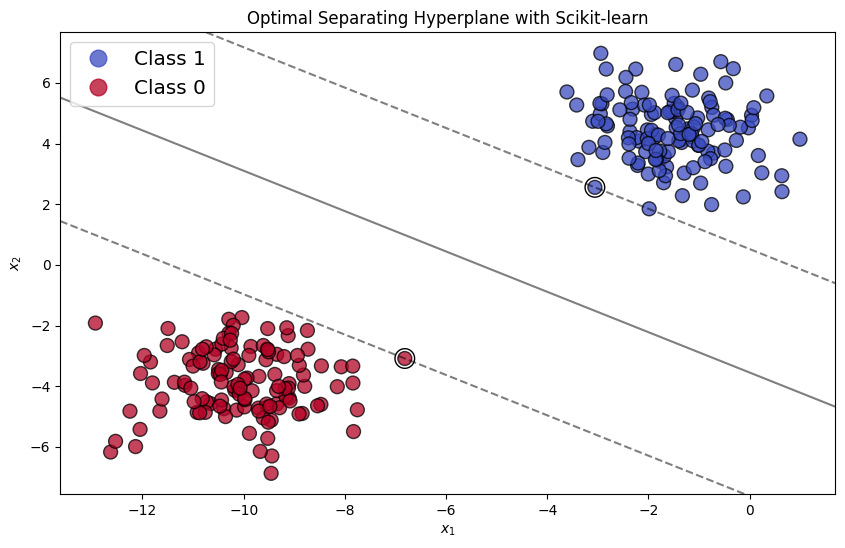

In [52]:
plt.figure(figsize=(10,6))
# plot data and margin
scatter_data = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='black', cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter_data.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=2)
plot_svc_decision_function(clf)

# plot support vectors
scatter_support = plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                              s=200, edgecolors='k', facecolors='none')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Optimal Separating Hyperplane with Scikit-learn");

<font face="Times New Roman"><div id="1-2">
## <font color="#800080" size=6>**1-2. Soft Margin SVM**</font>
</div>

<font face="Times New Roman" size=3>
Also called: Soft Margin Classifier

<font face="Times New Roman"><div id="1-3-1">
### <font color="#800080" size=5>**1-2-1. What is the Challenge?**</font>
</div>

<font face="Times New Roman" size=3>
As you can guess and it is mentioned in the class, Maximal Margin Classifier only works correctly when the data of two classes are linearly separable. Also, the border of this model is determined by the samples that are placed on the border; In fact, if only one of the training samples close to the border has some size change, the decision border changes completely! It is important to mention that our data in reality has some noise in most cases and therefore the above problem can have an adverse effect on our decision boundary. Therefore, this model is highly capable of overfitting. For a better understanding, we will try the Maximal Margin Classifier model using Scikit-learn for the mentioned situation. First, we fit our model on the primary dataset that has linear separability; Then we add a noise sample to each class and fit a new model on them to see their effect on the decision boundary.
</font>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [53]:
N = 250
p = 2
X, y = datasets.make_blobs(
    n_samples=N, n_features=p, centers=2, cluster_std=1.05, random_state=1
)

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>

In [54]:
# Add noise sample
X_noisy = np.concatenate((X,[[-5,1], [-6,-1]]), axis=0)
y_noisy = np.append(y,[0,1])

##### <font color="#008080" face="Times New Roman" size=4> - Visualizing Dataset </font>

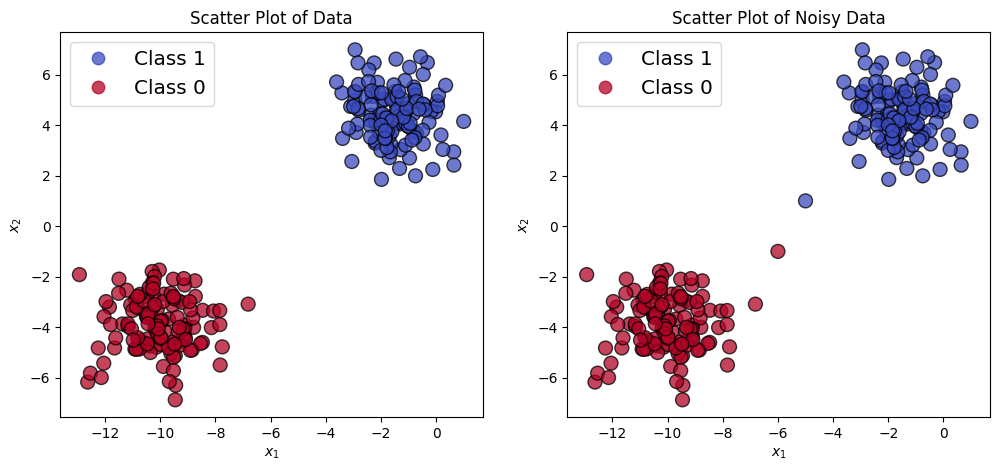

In [55]:
import matplotlib.pyplot as plt

# Plot intial data
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', edgecolor='black', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of Data");

# Plot noisy data
plt.subplot(1,2,2)
scatter = plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, s=100, cmap='coolwarm', edgecolor='black', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of Noisy Data");

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [56]:
from sklearn.svm import SVC

#Maximal Margin Classifier on initial dataset
clf1 = SVC(kernel='linear', C=10)

#Maximal Margin Classifier on the dataset with a noisy sample
clf2 = SVC(kernel='linear', C=10)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [57]:
#Maximal Margin Classifier on initial dataset
clf1.fit(X, y);

#Maximal Margin Classifier on the dataset with a noisy sample
clf2.fit(X_noisy, y_noisy);

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

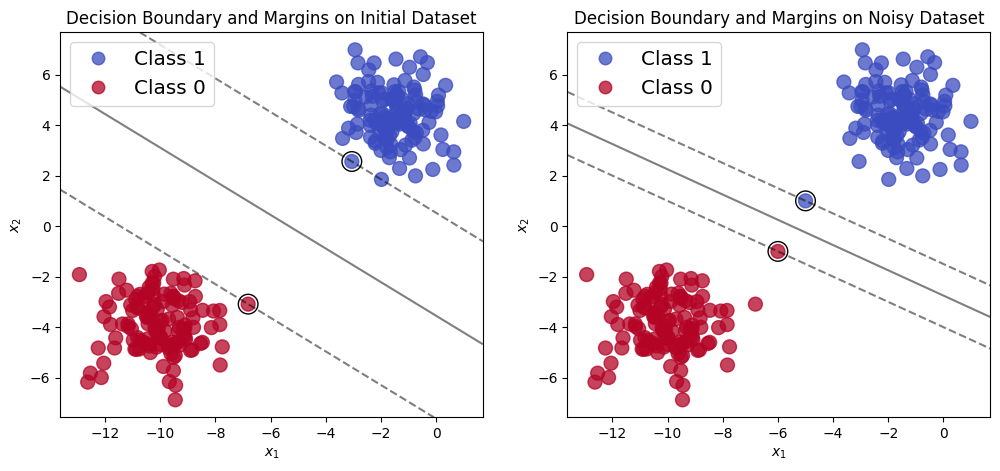

In [58]:
plt.figure(figsize=(12,5))

# plot data and margin on initial dataset
plt.subplot(1,2,1)
scatter1 = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter1.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plot_svc_decision_function(clf1)
# plot support vectors
plt.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on Initial Dataset");


# plot data and margin on noisy dataset
plt.subplot(1,2,2)
scatter2 = plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, cmap='coolwarm', s=100, alpha=0.75)
plt.legend(handles=scatter2.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plot_svc_decision_function(clf2)
# plot support vectors
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on Noisy Dataset");

<font face="Times New Roman" size=3>
As we can see, in the diagram on the left of the drawn decision boundary, its margin has a significant value; While in the graph on the right, due to the presence of two noise samples, the decision boundary and its margins have changed and the margin value has decreased a lot. Therefore, our confidence in the decision boundary will decrease due to the reduction of its margin.
</font>

<font face="Times New Roman"><div id="1-3-1">
### <font color="#800080" size=5>**1-2-2. Soft Margin Classifier**</font>
</div>

<font face="Times New Roman" size=3>
The solution to this problem is to use soft margin classifier. Instead of finding a hypermap that completely separates all the data of the two classes, you can use a hypermap that separates most of the data of the two classes from each other; Our motivation for doing this can be that our classifier has less sensitivity to each sample and thus has a lower probability of overfitting. In fact, our model misclassifies a relatively small number of training samples in order to have a better generalization on the test data.
</font>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [59]:
N = 200
p = 2
X, y = datasets.make_blobs(
    n_samples=N, n_features=p, centers=2, cluster_std=3, random_state=1
)

##### <font color="#008080" face="Times New Roman" size=4> - Visualizing Dataset </font>

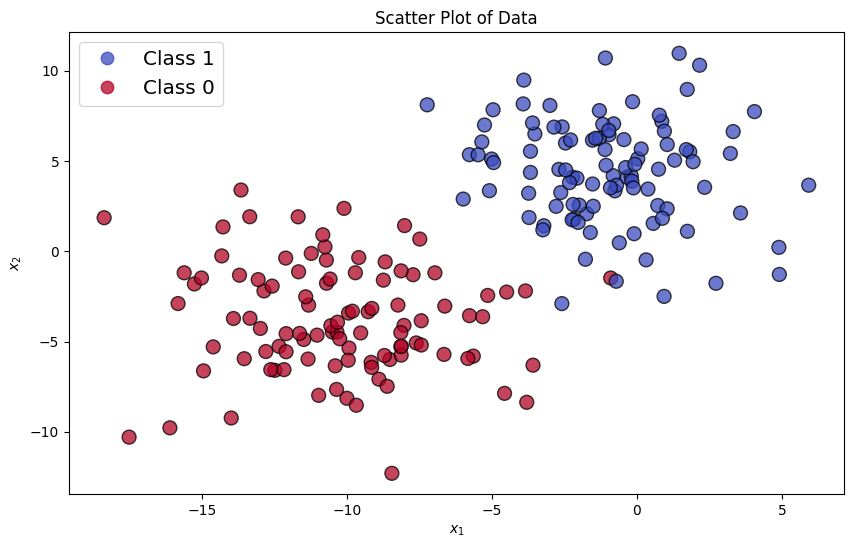

In [60]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', edgecolor='black', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of Data");
plt.show()

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

<font face="Times New Roman" size=3>
As you know from the class and theory notebooks, the soft margin machine has a hyperparameter C that we must determine. For this, we train four models with four different C values to see their results.
</font>

In [61]:
# Define C values
C_vals = [0.01, 0.1, 1, 10]

# Initialize models
models = []
for c in C_vals:
  models.append(SVC(kernel='linear', C=c))

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [62]:
for clf in models:
  clf.fit(X, y)

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

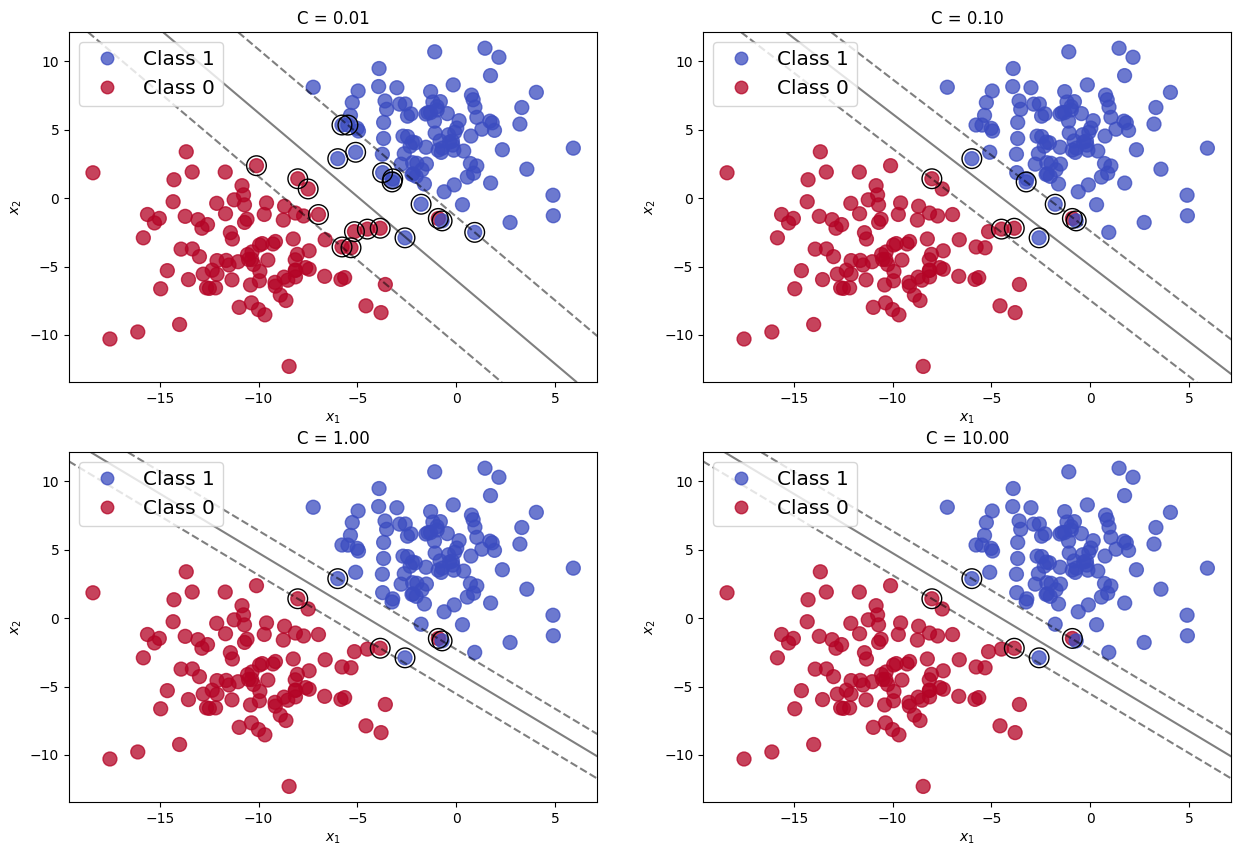

In [63]:
plt.figure(figsize=(15, 10))
for i in range(len(models)):
    plt.subplot(2,2,i+1)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', alpha=0.75)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)

    # Select classifier model
    clf = models[i]

    # Plot using helper method
    plot_svc_decision_function(clf)

    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("C = %.2f" % C_vals[i])
    del clf

<font face="Times New Roman" size=3>
As you can see, with the increase of C, the obtained margin has become smaller and also the number of support samples has also decreased; It means that fewer samples have played a role in defining this border. So, we can use the soft margin classifier for classification by obtaining a suitable value for this hyperparameter so that the model has more robustness than the training samples.
</font>

<font face="Times New Roman"><div id="1-3">
## <font color="#800080" size=6>**1-3. Kernel SVM**</font>
</div>

<font face="Times New Roman"><div id="1-3-1">
### <font color="#800080" size=5>**1-3-1. What is the Challenge?**</font>
</div>

<font face="Times New Roman" size=3>
Despite the use of Soft Margin Classifier, our model is still limited to detect linear boundaries; While linear models have many limitations and do not respond to many real world problems. In the following, we give an example of the inability of linear models to classify non-linear data.
</font>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [64]:
# create dataset
X, y = datasets.make_circles(200, factor=0.1, noise=0.1, random_state=1)

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

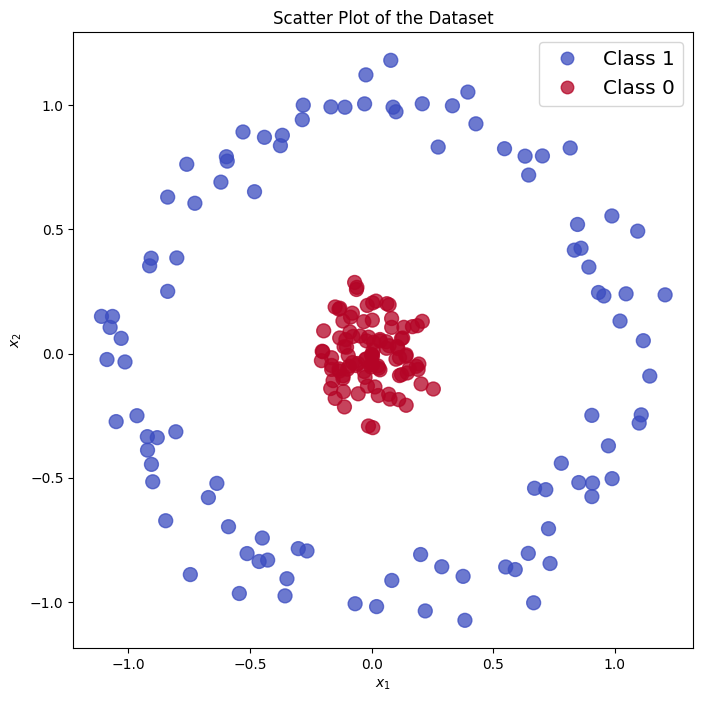

In [65]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing </font>

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [67]:
from sklearn.svm import SVC

#Build the classifier
clf = SVC(kernel='linear', C=10)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [68]:
# Fit the model on the train data
clf.fit(X_train, y_train)

SVC(C=10, kernel='linear')

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction</font>

In [69]:
# Predict the model on test data
y_pred_test = clf.predict(X_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [70]:
#Find the accuracy of model on test set by comparing the predicted labels with their true values
accuracy = np.sum(y_test==y_pred_test) / len(y_test)

print("Maximal Margin Classifier Accuracy:", accuracy*100, "%")

Maximal Margin Classifier Accuracy: 52.5 %


<font face="Times New Roman" size=3>
As you can see, the accuracy of the model is 52.5%, which is far from our ideal.
</font>

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

<font face="Times New Roman" size=3>
We can also plot boundaries and margins.

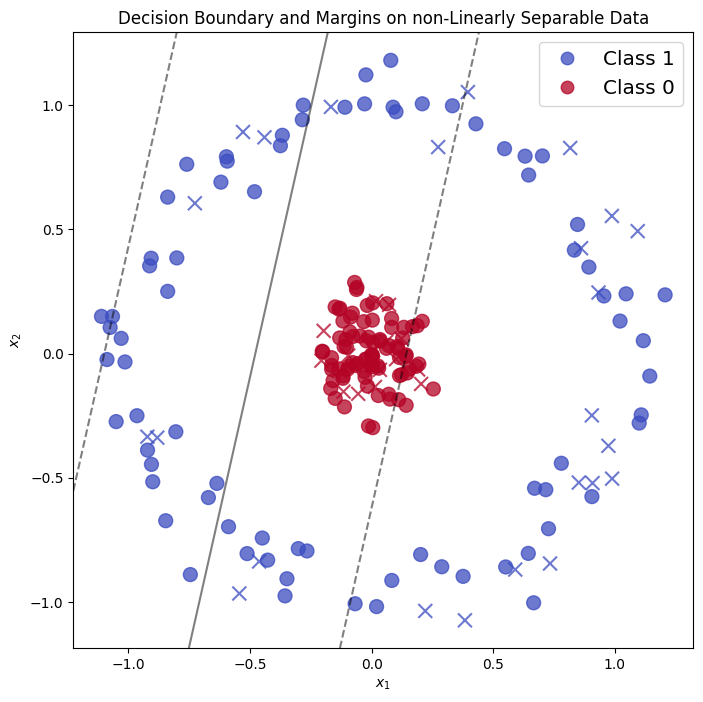

In [71]:
plt.figure(figsize=(8, 8))
train_plt = plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, cmap='coolwarm', s=100, alpha=0.75)
test_plt = plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, cmap='coolwarm', s=100, alpha=0.75)
plot_svc_decision_function(clf)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on non-Linearly Separable Data")
plt.legend(handles=train_plt.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.show()

<font face="Times New Roman"><div id="1-3-2">
### <font color="#800080" size=5>**1-3-2. Introduction to Kernel**</font>
</div>

<font face="Times New Roman" size=3>
As we said, sometimes the data of two classes may not be linearly separable and we should use a curve as a separating boundary. In fact, we should be able to obtain non-linear boundaries so that our algorithm can be used more. One of the possible ways to achieve this goal is to expand our feature space to higher dimensions through feature transformation. Consider the dataset from the previous section; As it is clear from the data distribution, a circular boundary can separate the data of two classes from each other; But our algorithm is limited to detect linear boundaries. Now we define a new feature as $X_3 = X_1^2+X_2^2$ for the data.

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [72]:
# create dataset
X, y = datasets.make_circles(200, factor=0.1, noise=0.1, random_state=1)

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing </font>

In [73]:
#Add a new feature as: x_3 = x_1^2+x_2^2
X_1 = X[:,0]
X_2 = X[:, 1]
X_3 = X_1**2 + X_2**2
X3d = np.concatenate((X, X_3.reshape(-1,1)), axis=1)

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

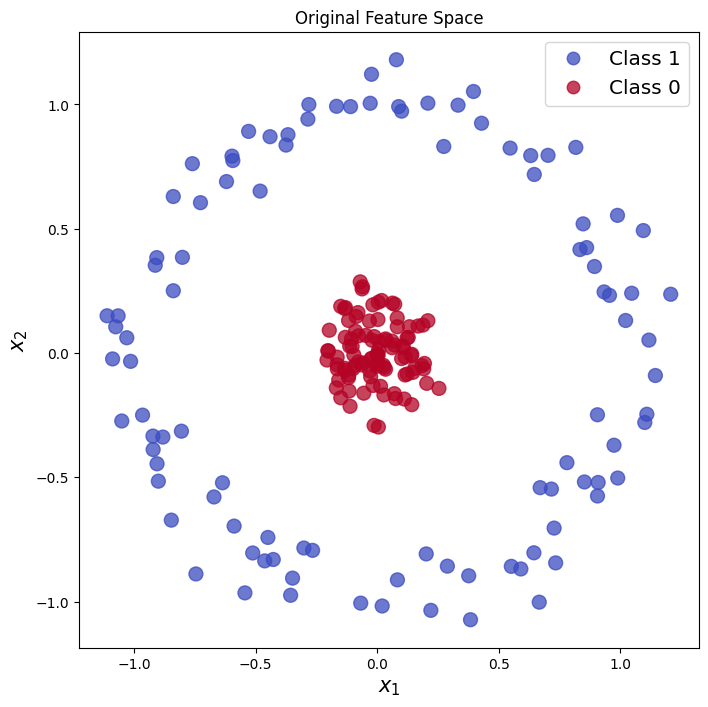

In [74]:
plt.figure(figsize=(8,8))
scatter2d = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter2d.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.title("Original Feature Space")
plt.show()

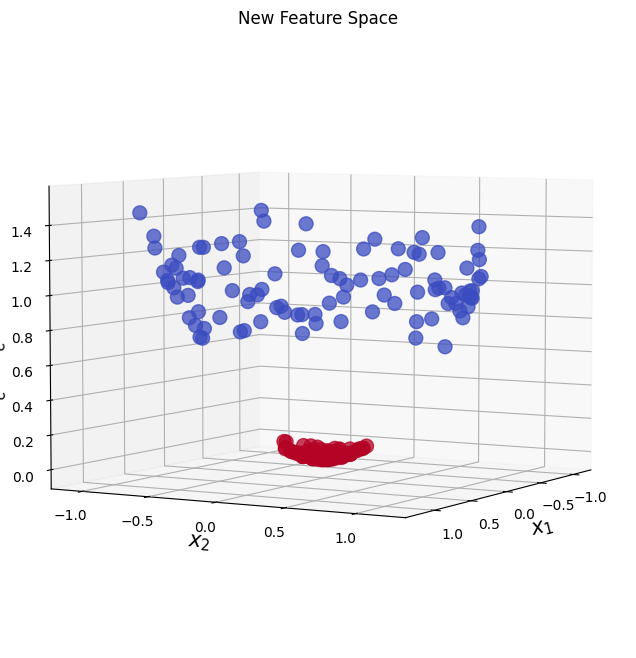

In [75]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X3d[:, 0], X3d[:, 1], X3d[:, 2], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
ax.view_init(elev=5, azim=30)
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.set_zlabel('$x_3=x_1^2+x_2^2$', fontsize=15)
ax.set_title('New Feature Space')
plt.show()

<font face="Times New Roman" size=3>
Now we can use a linear model on the new data to classify the two classes.

<font face="Times New Roman"><div id="1-3-3">
### <font color="#800080" size=5>**1-3-3. Polynomial Kernel**</font>
</div>

<font face="Times New Roman" size=3>
As you saw in the previous example, adding the second-order feature made our data linearly separable in the new space. A good idea would be to add higher degrees to our feature space, resulting in a high-order classifier curve in the original space. Using the polynomial kernel we can add this to the feature space without having to add them ourselves; So, in this case, increasing the number of features will not cause any problem.
<br>Next, on the following dataset, we use the 3rd order kernel once and the 9th order kernel once to train the model and draw their decision area. For this, it is enough to set the <code>kernel</code> hyperparameter to <code>poly</code> and specify its degree. Also, like the Soft Margin Classifier problem, we must also specify the <code>C</code> parameter. For simplicity and better display of separated regions of classes, we use the <code>plot_decision_region</code> function from the <code>mlxtend</code> library; so if you don't have it installed, install it using <code>pip install mlxtend</code>.

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [76]:
# create dataset
X, y = datasets.make_moons(n_samples=200,noise=0.15, random_state=0)

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

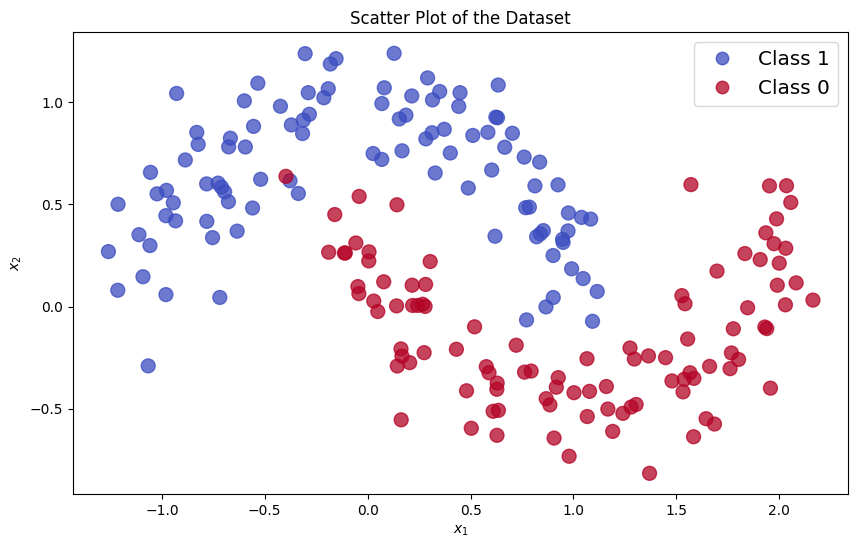

In [77]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [78]:
# A 3rd order poly kernel svc
clf_3rd_order = SVC(kernel='poly', degree=3, C=10)

# A 9th order poly kernel svc
clf_9th_order = SVC(kernel='poly', degree=9, C=10)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [79]:
clf_3rd_order.fit(X, y)

clf_9th_order.fit(X, y)

SVC(C=10, degree=9, kernel='poly')

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

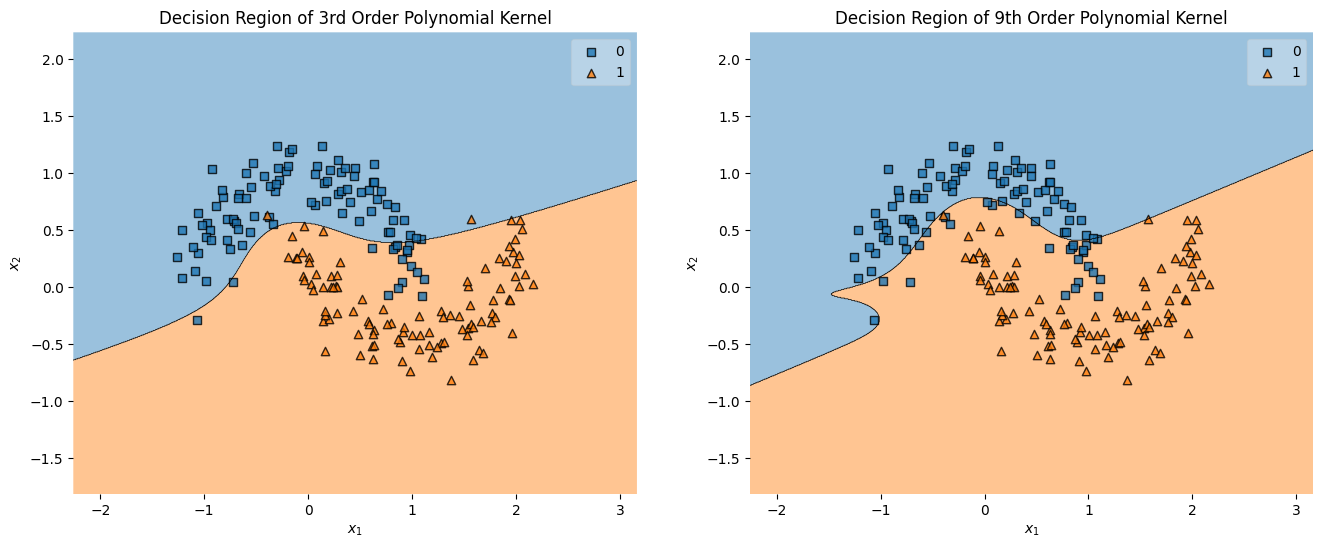

In [80]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(16, 6))

# Plot the 3rd order poly kernel svc
plt.subplot(1,2,1)
plot_decision_regions(X, y, clf=clf_3rd_order, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of 3rd Order Polynomial Kernel")

# Plot the 9th order poly kernel svc
plt.subplot(1,2,2)
plot_decision_regions(X, y, clf=clf_9th_order, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of 9th Order Polynomial Kernel");

<font face="Times New Roman" size=3>
As you can see, adding higher degrees of features does not necessarily lead to the improvement of the decision boundary and the best degree should be found using cross validation. In fact, if our model is overfit, lower orders should be used as the degree of this kernel, and if the model is underfit, its complexity should be increased by increasing this degree.

<font face="Times New Roman"><div id="1-3-4">
### <font color="#800080" size=5>**1-3-4. Radial Basis Function (RBF)**</font>
</div>

<font face="Times New Roman" size=3>
Another widely used kernel is RBF (Gaussian Radial Basis Function), which is described in the Theory Notebook. In the following, first, for better intuition, we draw this kernel on a data set, then we train two SVMs on two different data sets using this kernel and observe the results.

#### <font color="#008080" face="Times New Roman" size=4>**Kernel Visualization**</font>

<font face="Times New Roman" size=3>
The hyperparameter $\gamma$ determines the value of the variance of this function. The lower this parameter is, the greater the variance and relatively more weight will be given to distant samples, and vice versa.

In [81]:
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

In [82]:
def plot_RBF_kernel(gamma):
  R = np.exp(-gamma*(X1 ** 2 + X2 ** 2))

  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(111, projection='3d')
  surf = ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
  plt.title('RBF kernel with $\gamma$ = {:.1f}'.format(gamma), fontsize=15)
  plt.show()

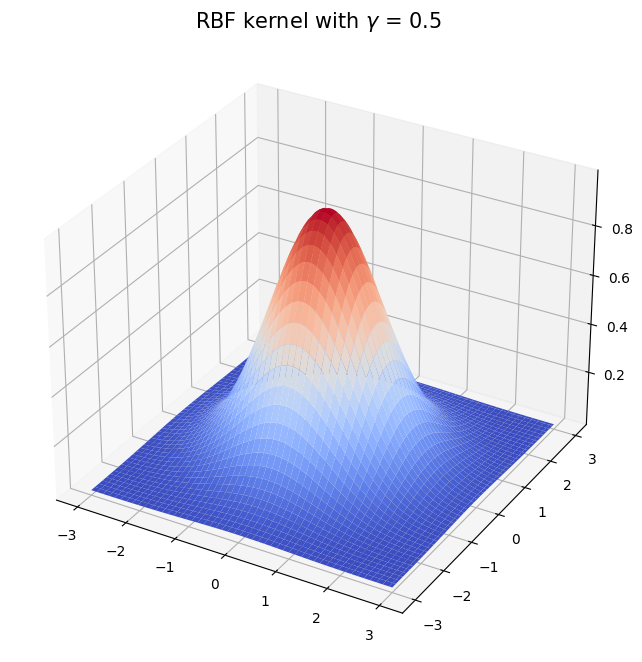

In [83]:
plot_RBF_kernel(gamma = 0.5)

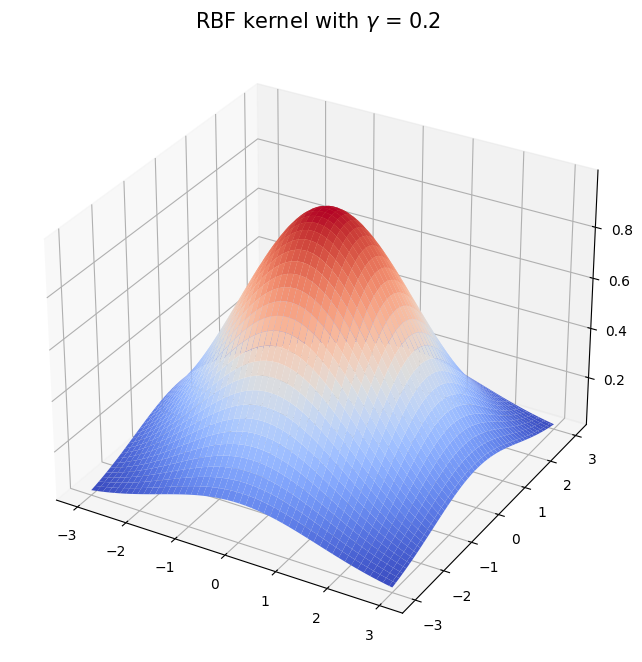

In [84]:
plot_RBF_kernel(gamma = 0.2)

#### <font color="#008080" face="Times New Roman" size=4>**Dataset 1**</font>

<font face="Times New Roman" size=3>
Consider the <code>make_circles</code> dataset again.

In [85]:
X, y = datasets.make_circles(n_samples=200, factor=0.1, noise=0.1, random_state=1)

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

<font face="Times New Roman" size=3>
If we choose RBF function as a kernel (by setting <code>kernel="rbf"</code>), we can see our decision boundaries.

In [86]:
clf = SVC(kernel='rbf', gamma=0.7, C=10)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [87]:
clf.fit(X, y)

SVC(C=10, gamma=0.7)

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

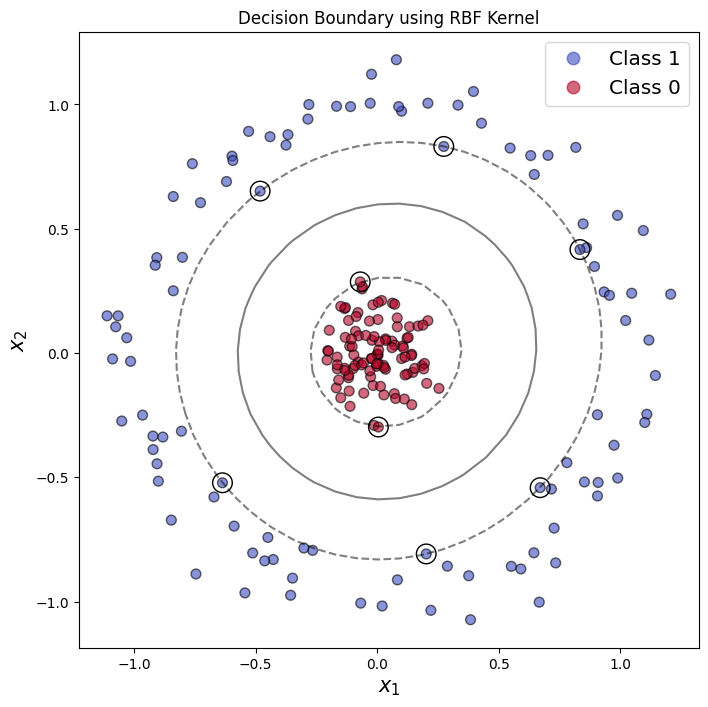

In [88]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.title("Decision Boundary using RBF Kernel")
plt.show()

#### <font color="#008080" face="Times New Roman" size=4>**Dataset 2**</font>

<font face="Times New Roman" size=3>
For the make_moons dataset, we will also have:

In [89]:
X, y = datasets.make_moons(n_samples=200,noise=0.15, random_state=0)

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [90]:
clf = SVC(kernel='rbf', gamma=0.8, C=5)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [91]:
clf.fit(X, y)

SVC(C=5, gamma=0.8)

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

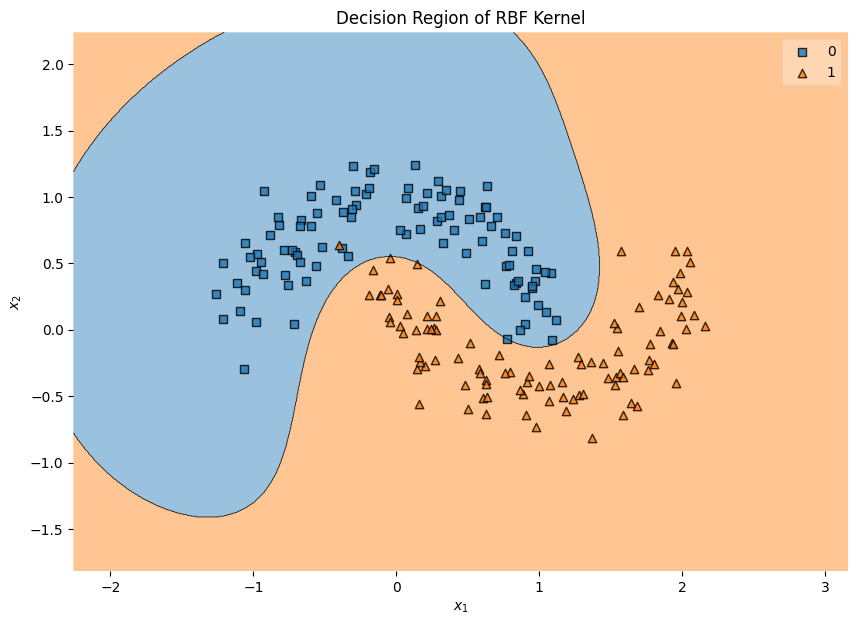

In [92]:
plt.figure(figsize=(10,7))
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of RBF Kernel")
plt.show()

<font face="Times New Roman" size=3>
As you can see, by using the RBF kernel, the boundary of two classes of data is obtained much better, and this kernel usually has a better performance. Also, by default, the SVC model kernel is set on this kernel.

<font face="Times New Roman"><div id="1-4">
## <font color="#800080" size=6>**1-4. Multi-Class SVM**</font>
</div>

<font face="Times New Roman" size=3>
Using the scikit-learn library, we will try the One-vs-One method on the following dataset.

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [93]:
from sklearn import datasets

X, y = datasets.make_blobs(
    n_samples=300, n_features=2, centers=3, cluster_std=1.5, random_state=10
)

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

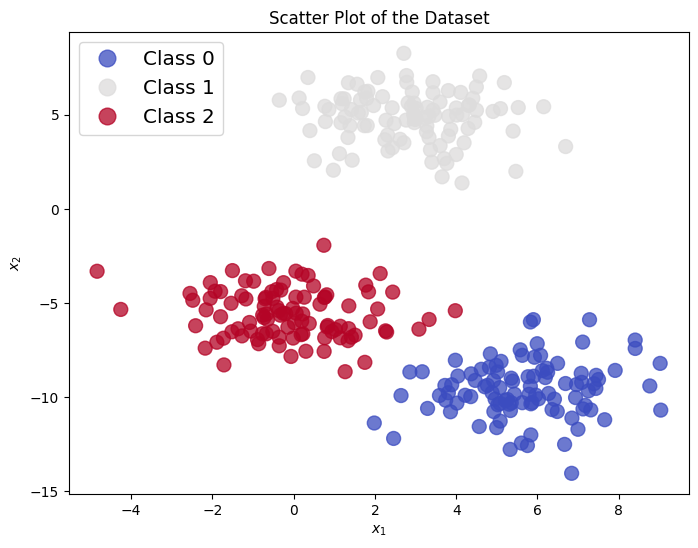

In [94]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75);
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0','Class 1', 'Class 2'], fontsize='x-large', markerscale=2)
plt.show();

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

<font face="Times New Roman" size=3>
To change the classification type, just set the <code>decision_function_shape</code> hyperparameter to <code>ovo</code> (one-vs-one) or <code>ovr</code> (one-vs-rest). We use three kernels, linear, polynomial and RBF, and define three models.

In [95]:
from sklearn.svm import SVC

#Linear Kernel
clf_linear = SVC(kernel='linear', decision_function_shape='ovo')

#RBF Kernel
clf_rbf = SVC(kernel='rbf', gamma=0.8, C=5, decision_function_shape='ovo')

#Polynomial Kernel
clf_poly = SVC(kernel='poly', degree=3, decision_function_shape='ovo')

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [96]:
clf_linear.fit(X, y)
clf_rbf.fit(X, y)
clf_poly.fit(X, y)

SVC(decision_function_shape='ovo', kernel='poly')

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

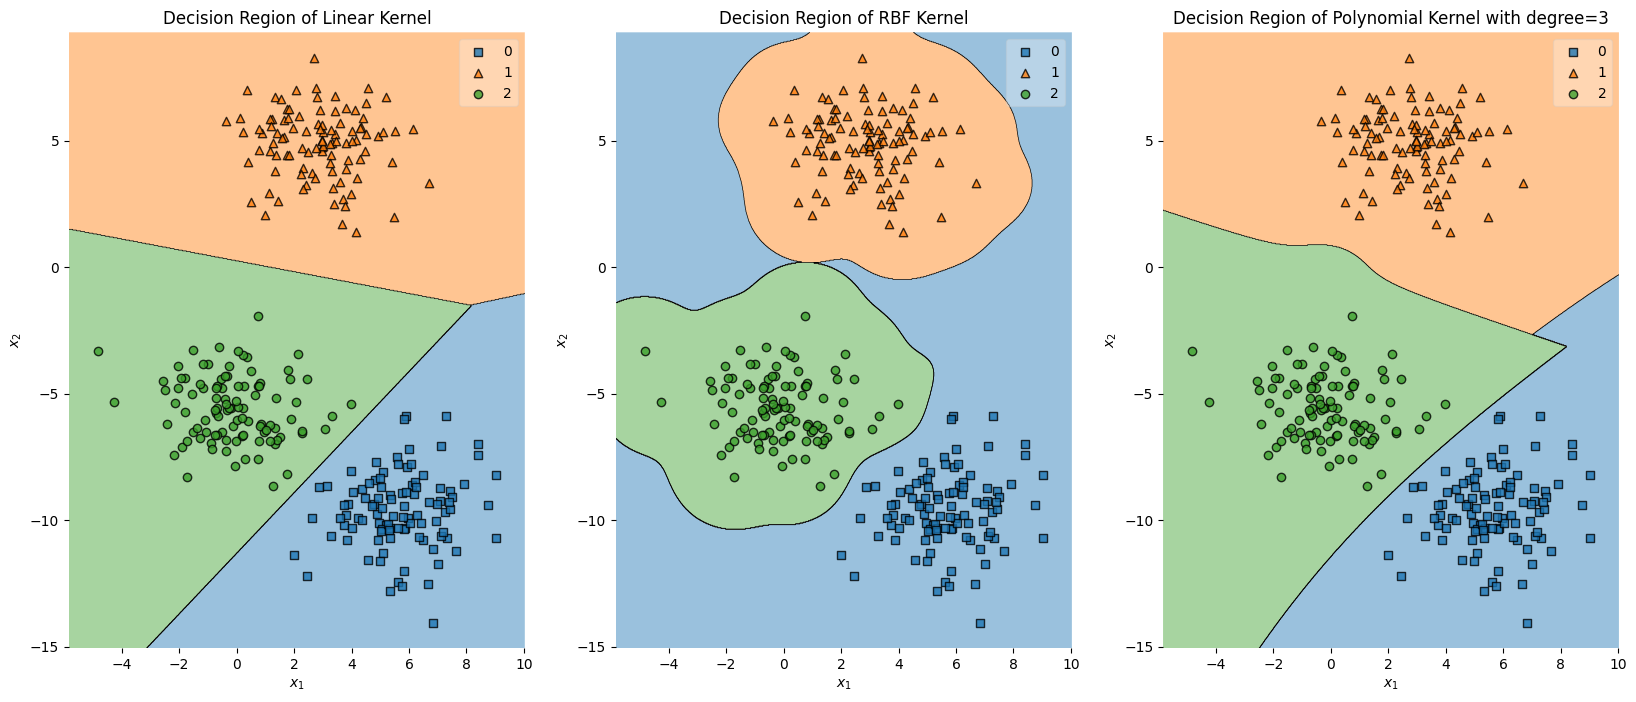

In [97]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(20,8))

#Linear Kernel
plt.subplot(1,3,1)
plot_decision_regions(X, y, clf=clf_linear, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of Linear Kernel")

#Polynomial Kernel
plt.subplot(1,3,3)
plot_decision_regions(X, y, clf=clf_poly, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of Polynomial Kernel with degree=3")

#RBF Kernel
plt.subplot(1,3,2)
plot_decision_regions(X, y, clf=clf_rbf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of RBF Kernel")

plt.show()

<font face="Times New Roman"><div id="2">
# <font color="#800080" size=6>**2. Support Vector Regression (SVR)**</font>
</div>

<font face="Times New Roman" size=3>
The Margin idea can also be used for regression problems and thus Support Vector Regression (SVR) is defined. As in the case of classification, kernels can be used in the regression problem in a similar way, and rbf and polynomial kernels are also defined for. In the following, we will try to compare the effect of these kernels using <code>sklearn.svm</code> on a one-dimensional dummy dataset.

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Creating Dataset </font>

In [98]:
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() #y = sin(x)

#Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(10))

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

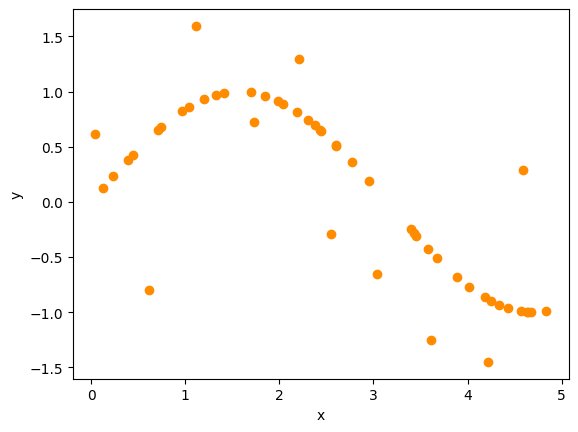

In [99]:
plt.scatter(X, y, color='darkorange', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [100]:
from sklearn.svm import SVR

# Set the epsilon for the width of streets!
eps=0.2

# Linear Model
svr_lin = SVR(kernel='linear', C=1e3, epsilon=eps)

# RBF Model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=eps)

# Polynomial Model
svr_poly = SVR(kernel="poly", C=100, degree=3, epsilon=eps)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [101]:
# Linear Model
y_lin = svr_lin.fit(X, y).predict(X)

# RBF Model
y_rbf = svr_rbf.fit(X, y).predict(X)

# Polynomial Model
y_poly = svr_poly.fit(X, y).predict(X)

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

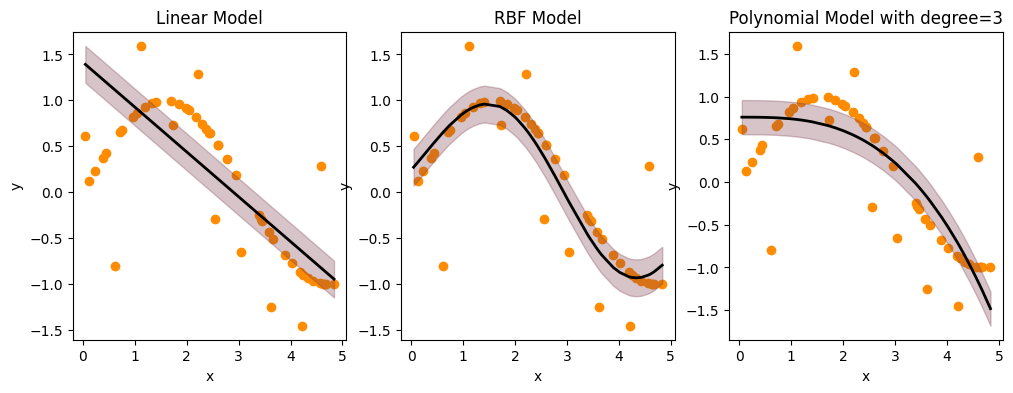

In [102]:
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_lin, color='k', lw=2)
plt.title('Linear Model')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(X.ravel(), y_lin - eps, y_lin + eps, edgecolor='none', color='#7D3C4A', alpha=0.3)

plt.subplot(1,3,2)
plt.scatter(X, y, color='darkorange')
plt.plot(X, y_rbf, color='k', lw=2)
plt.title('RBF Model')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(X.ravel(), y_rbf - eps, y_rbf + eps, edgecolor='none', color='#7D3C4A', alpha=0.3)

plt.subplot(1,3,3)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_poly, color='k', lw=2)
plt.title('Polynomial Model with degree=3')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(X.ravel(), y_poly - eps, y_poly + eps, edgecolor='none', color='#7D3C4A', alpha=0.3)
plt.show()

<font face="Times New Roman" size=3>
As it is clear, by using RBF kernel, we have higher accuracy in fitting. We should also be able to obtain the appropriate value of hyperparameters of each model, which is done using Cross Validation.

<font face="Times New Roman"><div id="2">
# <font color="#008080" size=6>**References**</font>
</div>


- GeÌron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly.

- https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Slides/Chapter_02_Classical_Models/Clustering/section%202-3.pdf
